# Naive Bayes - Custom Implementation
## Project Overview
This Jupyter Notebook demonstrates the custom implementation of the Naive Bayes algorithm to classify drugs based on a set of patient attributes. The purpose is to develop an understanding of the Naive Bayes algorithm's internals by coding it from scratch and applying it to real-world medical data. This approach reinforces fundamental principles of probability and statistics and provides control over every aspect of the algorithm's behavior, which is crucial for educational and debugging purposes.

## Dataset Description
The dataset features medical profiles of patients along with the drugs prescribed based on various attributes:

- Age: Patient's age.
- Sex: Patient's gender (Male/Female).
- BP: Blood pressure levels (HIGH, NORMAL, LOW).
- Cholesterol: Cholesterol levels (HIGH, NORMAL).
- Na: Sodium levels in the blood.
- K: Potassium levels in the blood.
- Drug: Type of drug prescribed (DrugY, drugC, drugX, drugA, drugB).

## Objectives
- Custom Algorithm Development: Construct a Naive Bayes classifier from the ground up to understand each component of the model.
- Data Preprocessing: Prepare the dataset for analysis, which includes handling categorical data and normalizing where necessary.
- Model Evaluation: Use the training data to evaluate the model's performance, applying metrics such as accuracy and visualizing results through confusion matrices.
- Insights through Visualization: Explore the distribution of various features and the model's predictions to extract actionable insights.

## Implementation Details
The notebook is organized into the following sections:

- Data Loading and Preprocessing: Loading data from CSV files and encoding categorical variables appropriately for the Naive Bayes model.
- Exploratory Data Analysis (EDA): Visual analysis of the data to understand distributions and correlations between different attributes.
- Building the Naive Bayes Classifier: Detailed step-by-step implementation of the Naive Bayes algorithm, including probability calculations and decision rules.
- Evaluation on Training Data: Testing the classifier on the training set to assess its effectiveness and tuning its performance.
- Visualization of Predictive Outcomes: Using plots to visualize the accuracy and the errors made by the classifier.

## Conclusion: 
Discussing the results, the efficacy of the custom model, and potential areas for further improvement or expansion.

With these objectives and structure, this notebook aims to provide a comprehensive understanding of building and applying a Naive Bayes classifier in a practical setting.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
data_path = "drug.csv"
new_data_path = "drug_new.csv"

# Reading the datasets
data = pd.read_csv(data_path)
new_data = pd.read_csv(new_data_path)

# Displaying the first few rows of each dataset
data.head()

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY


In [3]:
new_data.head()

,Age,Sex,BP,Cholesterol,Na,K
0,50,F,LOW,HIGH,0.792674,0.037851
1,47,M,HIGH,NORMAL,0.643455,0.040746
2,23,M,NORMAL,NORMAL,0.740936,0.048417
3,15,F,LOW,HIGH,0.888144,0.066680


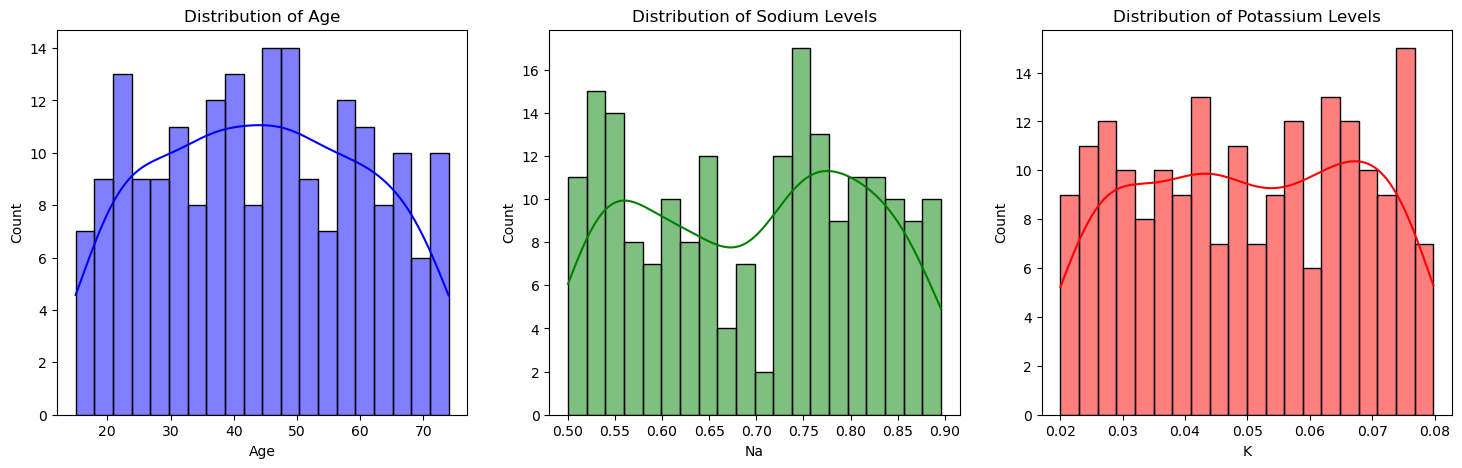

In [4]:
# Setting up the visualization
plt.figure(figsize=(18, 5))

# Plotting distributions of numerical features
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, bins=20, color='blue')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(data['Na'], kde=True, bins=20, color='green')
plt.title('Distribution of Sodium Levels')

plt.subplot(1, 3, 3)
sns.histplot(data['K'], kde=True, bins=20, color='red')
plt.title('Distribution of Potassium Levels')

plt.show()

# Naive Bayes algorithm

In [5]:
# Define function to calculate prior probabilities of the classes from the target column
def apriori(data, class_column):
    # Count the occurrences of each class in the target column
    a = data[class_column].value_counts()
    # Normalize the counts to get probabilities (total sum equals 1)
    a = a / a.sum()
    # Convert the Series to a DataFrame for easier manipulation later
    a = a.to_frame().T
    return a

# Define function to calculate conditional probabilities for each feature given each class
def model(data, class_column, attributes):
    m = {}
    alpha = 1  # Smoothing factor, 1 is typical for Laplace Smoothing to handle zero frequencies
    for attribute in attributes:
        # Create a contingency table for attribute vs class
        mat_cont = pd.crosstab(data[attribute], data[class_column], margins=False)
        # Add alpha to each count for smoothing
        mat_cont += alpha
        # Normalize the counts across each column to get conditional probabilities P(feature|class)
        mat_cont = mat_cont.div(mat_cont.sum(axis=0))
        m[attribute] = mat_cont
    return m

# Define function to predict the class for a new instance using the learned probabilities
def predict(a, m, instance, class_column):
    pred = {}
    # Iterate over each class to calculate the posterior probability for the instance belonging to that class
    for class_value in a.columns:
        # Start with the logarithm of the prior probability of the class
        log_p = np.log(a[class_value].values[0])
        # Iterate over each attribute in the model
        for attribute in m:
            feature_value = instance[attribute].values[0]
            # Check if the feature value exists in the model; if so, use it to adjust the log probability
            if feature_value in m[attribute].index:
                log_p += np.log(m[attribute].loc[feature_value, class_value])
            else:
                # Handle unseen feature values or zero probabilities by adding a very small probability
                log_p += np.log(1 / (m[attribute].sum(axis=0)[class_value] + len(m[attribute].index)))
        # Convert log probability back to probability
        pred[class_value] = np.exp(log_p)
    return pred

# Calculate the prior probabilities of each class in the dataset
a = apriori(data, 'Drug')
# Build the model by calculating the conditional probabilities of each feature given each class
m = model(data, 'Drug', data.drop('Drug', axis=1).columns)

# Predicting classes for a new dataset
num_instances = len(new_data)
predictions = pd.DataFrame(0, index=np.arange(num_instances), columns=np.append(a.columns.values, 'prediction'))
# Loop over each instance in the new dataset
for i in range(num_instances):
    instance = new_data.iloc[i:i+1]
    # Calculate the predicted probabilities for each class
    pred_probs = predict(a, m, instance, 'Drug')
    # Store the probabilities and the most likely class (maximum probability)
    predictions.iloc[i, :-1] = list(pred_probs.values())
    predictions.iloc[i, -1] = max(pred_probs, key=pred_probs.get)

# Display the predictions
print(predictions)


          drugY         drugX         drugA         drugC         drugB  \
0  3.827325e-08  7.069271e-09  4.625068e-10  8.821630e-09  2.403818e-10   
1  4.231953e-08  4.134077e-10  1.536946e-08  1.907792e-10  6.421628e-09   
2  1.736186e-08  4.588825e-08  6.403940e-10  7.631168e-11  3.777428e-10   
3  1.913663e-08  9.425695e-09  2.312534e-10  8.821630e-09  2.403818e-10   

  prediction  
0      drugY  
1      drugY  
2      drugX  
3      drugY  


### Visualisation on the training dataset

Training Accuracy: 100.00%


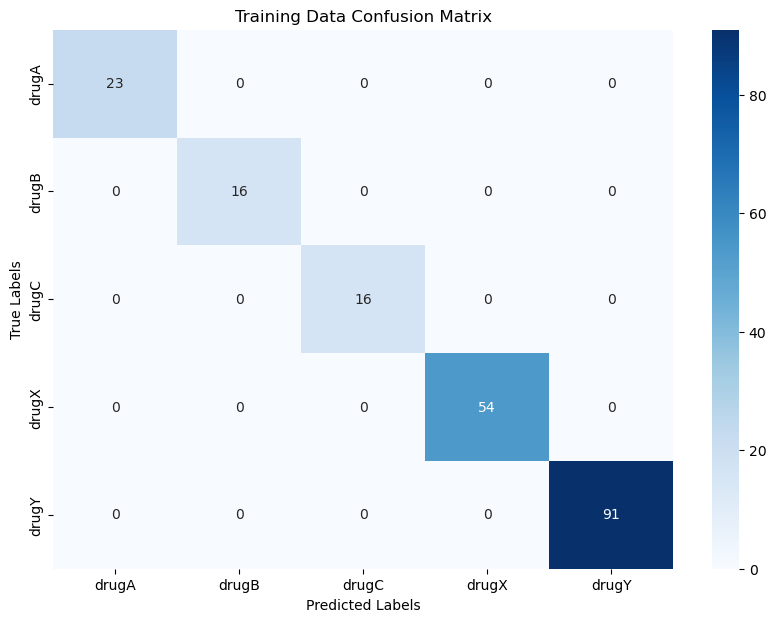

In [6]:
# First, we predict the classes for the training instances using the existing Naive Bayes model
train_predictions = pd.DataFrame(0, index=np.arange(len(data)), columns=np.append(a.columns.values, 'prediction'))

for i in range(len(data)):
    instance = data.iloc[i:i+1]
    pred_probs = predict(a, m, instance, 'Drug')
    train_predictions.iloc[i, :-1] = list(pred_probs.values())
    train_predictions.iloc[i, -1] = max(pred_probs, key=pred_probs.get)

# Extract the actual labels and the predicted labels from the training data
actual_labels_train = data['Drug']
predicted_labels_train = train_predictions['prediction']

# Calculate the accuracy for the training data
accuracy_train = accuracy_score(actual_labels_train, predicted_labels_train)
print(f"Training Accuracy: {accuracy_train * 100:.2f}%")

# Generate the confusion matrix for the training data
cm_train = confusion_matrix(actual_labels_train, predicted_labels_train, labels=np.unique(actual_labels_train))

# Visualize the confusion matrix for the training data
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(actual_labels_train), yticklabels=np.unique(actual_labels_train))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Training Data Confusion Matrix')
plt.show()


### Conclusion

In this project, we implemented a Naive Bayes classifier from scratch to classify drugs based on patient attributes, achieving a 100% accuracy rate on the training data. While such a result is exceptional and not typical in real-world scenarios, it is primarily due to the small and simple dataset used for demonstration purposes, highlighting the educational aim of understanding the algorithm's mathematics. This exercise provided valuable insights into the workings of probabilistic models and underscored the importance of evaluating model performance within the context of data complexity and size. Future iterations should include testing with more varied and extensive datasets and employing cross-validation to ensure broader applicability and robustness of the model.